In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [129]:
#read data set
data=pd.read_csv(r'C:\Users\shah\Downloads\LS_2.0.csv')
data.head(5)

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


# 1. data description

In [130]:
data.shape

(2263, 19)

In [131]:
data.isna().sum()

STATE                                          0
CONSTITUENCY                                   0
NAME                                           0
WINNER                                         0
PARTY                                          0
SYMBOL                                       245
GENDER                                       245
CRIMINAL\nCASES                              245
AGE                                          245
CATEGORY                                     245
EDUCATION                                    245
ASSETS                                       245
LIABILITIES                                  245
GENERAL\nVOTES                                 0
POSTAL\nVOTES                                  0
TOTAL\nVOTES                                   0
OVER TOTAL ELECTORS \nIN CONSTITUENCY          0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY      0
TOTAL ELECTORS                                 0
dtype: int64

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STATE                                     2263 non-null   object 
 1   CONSTITUENCY                              2263 non-null   object 
 2   NAME                                      2263 non-null   object 
 3   WINNER                                    2263 non-null   int64  
 4   PARTY                                     2263 non-null   object 
 5   SYMBOL                                    2018 non-null   object 
 6   GENDER                                    2018 non-null   object 
 7   CRIMINAL
CASES                            2018 non-null   object 
 8   AGE                                       2018 non-null   float64
 9   CATEGORY                                  2018 non-null   object 
 10  EDUCATION                           

In [133]:
data.describe()

,WINNER,AGE,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
count,2263.000000,2018.000000,2.263000e+03,2263.000000,2.263000e+03,2263.000000,2263.000000,2.263000e+03
mean,0.238179,52.273538,2.615991e+05,990.710561,2.625898e+05,15.811412,23.190525,1.658016e+06
std,0.426064,11.869373,2.549906e+05,1602.839174,2.559822e+05,14.962861,21.564758,3.145187e+05
min,0.000000,25.000000,1.339000e+03,0.000000,1.342000e+03,0.097941,1.000039,5.518900e+04
25%,0.000000,43.250000,2.103450e+04,57.000000,2.116250e+04,1.296518,1.899502,1.530014e+06
50%,0.000000,52.000000,1.539340e+05,316.000000,1.544890e+05,10.510553,16.221721,1.679030e+06
75%,0.000000,61.000000,4.858040e+05,1385.000000,4.872315e+05,29.468185,42.590233,1.816857e+06
max,1.000000,86.000000,1.066824e+06,19367.000000,1.068569e+06,51.951012,74.411856,3.150313e+06


In [134]:
data.tail(5)

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
2258,Maharashtra,YAVATMAL-WASHIM,Anil Jayram Rathod,0,IND,SHIP,MALE,0,43.0,GENERAL,Post Graduate,"Rs 48,90,000\n ~ 48 Lacs+","Rs 10,20,000\n ~ 10 Lacs+",14661,25,14686,0.766419,1.250060,1916185
2259,Telangana,ZAHIRABAD,B.B.PATIL,1,TRS,Car,MALE,18,63.0,GENERAL,Graduate,"Rs 1,28,78,51,556\n ~ 128 Crore+","Rs 1,15,35,000\n ~ 1 Crore+",434066,178,434244,28.975369,41.574183,1498666
2260,Telangana,ZAHIRABAD,MADAN MOHAN RAO,0,INC,Hand,MALE,0,49.0,GENERAL,Post Graduate,"Rs 90,36,63,001\n ~ 90 Crore+",Rs 0\n ~,427900,115,428015,28.559732,40.977823,1498666
2261,Telangana,ZAHIRABAD,BANALA LAXMA REDDY,0,BJP,Lotus,MALE,3,47.0,GENERAL,12th Pass,"Rs 5,85,77,327\n ~ 5 Crore+","Rs 52,50,000\n ~ 52 Lacs+",138731,216,138947,9.271379,13.302678,1498666
2262,Telangana,ZAHIRABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11138,2,11140,0.743328,1.066535,1498666


# 2. Data Preprocessing

# 2.4 Feature Reduction and Processing

In [135]:
data.drop(['STATE', 'CONSTITUENCY', 'NAME', 'SYMBOL',
        'GENERAL\nVOTES', 'POSTAL\nVOTES','TOTAL\nVOTES', 
       'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY'],axis=1,inplace = True)

In [136]:
data.columns

Index(['WINNER', 'PARTY', 'GENDER', 'CRIMINAL\nCASES', 'AGE', 'CATEGORY',
       'EDUCATION', 'ASSETS', 'LIABILITIES', 'TOTAL ELECTORS'],
      dtype='object')

In [137]:
#cleaning data for liability coloumn
data['LIABILITIES'].replace(['Not Available','Nil','NIL',np.nan,'~','Telangana'],'0',inplace=True)
a=data['LIABILITIES'].apply(lambda x:x.split()[1] if len(x.split())>1 else x.split()[0])
b = a.apply(lambda x:x.split(','))
c = b.apply(lambda x:''.join(x))
data['LIABILITIES']=c
data['LIABILITIES'] = Elec_df['LIABILITIES'].astype(int)

In [138]:
data.dtypes

WINNER               int64
PARTY               object
GENDER              object
CRIMINAL\nCASES     object
AGE                float64
CATEGORY            object
EDUCATION           object
ASSETS              object
LIABILITIES        float64
TOTAL ELECTORS       int64
dtype: object

In [139]:
#renaming columns
data.columns = ['WINNER', 'PARTY', 'GENDER', 'CRIMINAL_CASES', 'AGE', 'CATEGORY',
       'EDUCATION', 'ASSETS', 'LIABILITIES', 'TOTAL_ELECTORS']

In [140]:
data.head()

,WINNER,PARTY,GENDER,CRIMINAL_CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,TOTAL_ELECTORS
0,1,BJP,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+",231450.0,1489790
1,0,TRS,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+",847000.0,1489790
2,0,INC,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+",NaN,1489790
3,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489790
4,1,BJP,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+",8606522.0,1937690


# 2.1) Missing value Handling

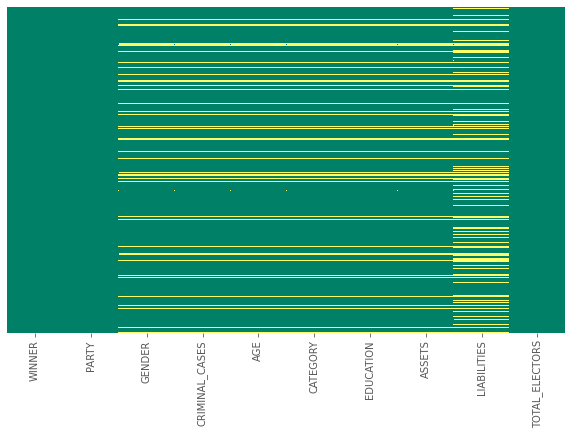

In [141]:
#visulaizing missing value columns
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),yticklabels=False , cbar =False ,cmap ='summer')
plt.show()

In [142]:
#checking null values for each feature
data.isna().sum()

WINNER              0
PARTY               0
GENDER            245
CRIMINAL_CASES    245
AGE               245
CATEGORY          245
EDUCATION         245
ASSETS            245
LIABILITIES       556
TOTAL_ELECTORS      0
dtype: int64

here is a strong chance that some rows have missing data in many features

even if we fill numerical values for criminal case, we cann't predict gender

so 245 rows are dropping

In [143]:
data.columns

Index(['WINNER', 'PARTY', 'GENDER', 'CRIMINAL_CASES', 'AGE', 'CATEGORY',
       'EDUCATION', 'ASSETS', 'LIABILITIES', 'TOTAL_ELECTORS'],
      dtype='object')

In [144]:
#dropping null values
data.dropna(inplace=True)
data.isnull().sum()

WINNER            0
PARTY             0
GENDER            0
CRIMINAL_CASES    0
AGE               0
CATEGORY          0
EDUCATION         0
ASSETS            0
LIABILITIES       0
TOTAL_ELECTORS    0
dtype: int64

now data is okay

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1707 entries, 0 to 2261
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WINNER          1707 non-null   int64  
 1   PARTY           1707 non-null   object 
 2   GENDER          1707 non-null   object 
 3   CRIMINAL_CASES  1707 non-null   object 
 4   AGE             1707 non-null   float64
 5   CATEGORY        1707 non-null   object 
 6   EDUCATION       1707 non-null   object 
 7   ASSETS          1707 non-null   object 
 8   LIABILITIES     1707 non-null   float64
 9   TOTAL_ELECTORS  1707 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 146.7+ KB


In [146]:
#criminal case feature has not available value
data['CRIMINAL_CASES']=data['CRIMINAL_CASES'].apply(lambda x:0 if x=='Not Available' else x)

# 2.2 Outliers detection

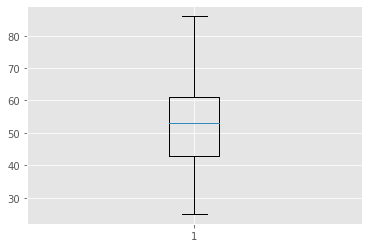

In [147]:
# for finding outliers we can use boxplot
# boxplot before removing the outliers
plt.boxplot(data["AGE"])
plt.show()


no outliers

Text(0.5, 1.0, 'Boxplot for LIABILITIES')

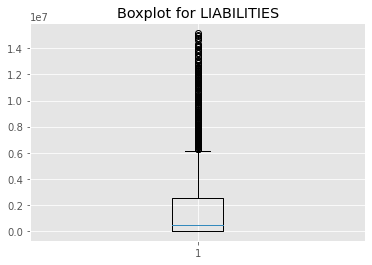

In [148]:
plt.boxplot(data['LIABILITIES'])
plt.title('Boxplot for LIABILITIES')

outliers present

In [149]:
Q1 = np.percentile(Elec_df['LIABILITIES'],25,interpolation = 'midpoint' )
Q2 = np.percentile(Elec_df['LIABILITIES'],50,interpolation = 'midpoint' )
Q3 = np.percentile(Elec_df['LIABILITIES'],75,interpolation = 'midpoint' )

In [150]:
print(Q1)
print(Q2)
print(Q3)

0.0
416612.0
2500000.0


In [152]:
data['LIABILITIES'].median()

416612.0

In [153]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
Up_lim = Q3+1.5*IQR
print(low_lim)
print(Up_lim)

-3750000.0
6250000.0


In [ ]:
 # remove values below  above 
 
 # create a loop to remove

In [154]:
outlier = []
for x in data['LIABILITIES']:
    if((x>Up_lim) or (x<low_lim)):
        outlier.append(x)

In [47]:
outlier

[15300000,
 22251891,
 32549132,
 18943977,
 306012685,
 28095176,
 24739098,
 70576979,
 79139288,
 57940950,
 19579691,
 205591400,
 110928567,
 23667368,
 84550726,
 80450870,
 166365972,
 33409505,
 20565404,
 204955775,
 17925000,
 27622685,
 31390310,
 198464347,
 26510293,
 26784734,
 29242618,
 63341667,
 1079582000,
 312521957,
 45079101,
 38320377,
 104302653,
 15596951,
 519320305,
 34400000,
 46548771,
 15925213,
 16881608,
 954852600,
 198479638,
 225214094,
 22231164,
 21696413,
 54880849,
 19861338,
 28346352,
 24650224,
 151084000,
 45967727,
 24069129,
 42963534,
 49080220,
 1016148176,
 18604443,
 21940000,
 24777000,
 22752880,
 58992436,
 258028373,
 258386550,
 18087123,
 197007553,
 358127700,
 66870634,
 104316683,
 195595693,
 21635686,
 464721999,
 23686000,
 115756111,
 102828604,
 37268162,
 215617501,
 43113473,
 27428941,
 72681681,
 51736254,
 176677024,
 585784500,
 31474526,
 25302234,
 19391778,
 24438446,
 342035860,
 33560974,
 33303902,
 29371716,
 1

In [ ]:
# find index of these outliers
# locate those in index columns

In [155]:
ind1 = data['LIABILITIES']>Up_lim
data.loc[ind1].index

Int64Index([   4,   10,   16,   21,   22,   23,   64,   66,   68,   73,
            ...
            2137, 2182, 2212, 2222, 2227, 2232, 2243, 2247, 2253, 2259],
           dtype='int64', length=187)

In [156]:
# drop it
data.drop(Elec_df.loc[ind1].index, inplace=True)

Text(0.5, 1.0, 'Boxplot for LIABILITIES')

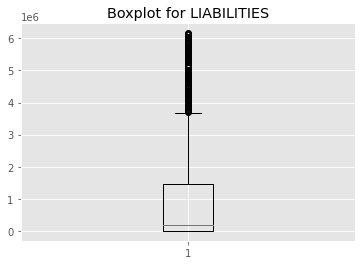

In [157]:
plt.boxplot(data['LIABILITIES'])
plt.title('Boxplot for LIABILITIES')

Reduced the outliers

In [158]:
data.shape

(1520, 10)

In [159]:
data.columns

Index(['WINNER', 'PARTY', 'GENDER', 'CRIMINAL_CASES', 'AGE', 'CATEGORY',
       'EDUCATION', 'ASSETS', 'LIABILITIES', 'TOTAL_ELECTORS'],
      dtype='object')

# Managing Catagorical Values

In [160]:
data[['PARTY','GENDER','CATEGORY','EDUCATION']].head()

,PARTY,GENDER,CATEGORY,EDUCATION
0,BJP,MALE,ST,12th Pass
1,TRS,MALE,ST,Post Graduate
6,INC,FEMALE,SC,Post Graduate
7,BJP,MALE,GENERAL,Doctorate
9,VBA,MALE,GENERAL,Graduate


# 2.6 Feature Engineering

Checking Feature party

In [162]:
data['PARTY'].value_counts()

BJP       295
INC       284
IND       176
BSP       135
CPI(M)     96
         ... 
MADP        1
ravp        1
SKM         1
AHNP        1
PHJSP       1
Name: PARTY, Length: 126, dtype: int64

132 parties, lets reduce this no.

In [163]:
data['PARTY']=data['PARTY'].apply(lambda x:x if data['PARTY'].value_counts().loc[x]>10 else 'Others')
data['PARTY'].value_counts()

BJP       295
INC       284
Others    236
IND       176
BSP       135
CPI(M)     96
AITC       42
VBA        41
NTK        34
SP         31
MNM        29
AAP        23
RJD        17
BJD        17
JD(U)      16
JnP        13
SHS        12
DMK        12
TDP        11
Name: PARTY, dtype: int64

Now Education Feature

In [164]:
data['EDUCATION'].value_counts()

Post Graduate            373
Graduate                 324
Graduate Professional    245
12th Pass                192
10th Pass                149
8th Pass                  67
Doctorate                 60
Others                    33
5th Pass                  25
Literate                  25
Not Available             22
Illiterate                 4
Post Graduate\n            1
Name: EDUCATION, dtype: int64

lets reduce its numbers

In [165]:
ill = ['Others','Not Available','Illiterate','Post Graduate\n']
data['EDUCATION']=data['EDUCATION'].apply(lambda x:'Illiterate' if x in ill else x)
data['EDUCATION'].value_counts()

Post Graduate            373
Graduate                 324
Graduate Professional    245
12th Pass                192
10th Pass                149
8th Pass                  67
Illiterate                60
Doctorate                 60
5th Pass                  25
Literate                  25
Name: EDUCATION, dtype: int64

In [166]:
data.head()

,WINNER,PARTY,GENDER,CRIMINAL_CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,TOTAL_ELECTORS
0,1,BJP,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+",231450.0,1489790
1,0,Others,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+",847000.0,1489790
6,0,INC,FEMALE,0,54.0,SC,Post Graduate,"Rs 5,50,75,753\n ~ 5 Crore+",0.0,1937690
7,1,BJP,MALE,0,37.0,GENERAL,Doctorate,"Rs 16,86,64,576\n ~ 16 Crore+",2623964.0,1861396
9,0,VBA,MALE,0,62.0,GENERAL,Graduate,"Rs 1,39,49,000\n ~ 1 Crore+",1400000.0,1861396


# 2.3 Encoding


In [181]:
dummy = pd.get_dummies(data[['GENDER','CATEGORY','PARTY','EDUCATION']],drop_first =True)
feature_data = pd.concat([data,dummy],axis=1)

In [182]:
feature_data.head()

,WINNER,PARTY,GENDER,CRIMINAL_CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,TOTAL_ELECTORS,...,PARTY_VBA,EDUCATION_12th Pass,EDUCATION_5th Pass,EDUCATION_8th Pass,EDUCATION_Doctorate,EDUCATION_Graduate,EDUCATION_Graduate Professional,EDUCATION_Illiterate,EDUCATION_Literate,EDUCATION_Post Graduate
0,1,BJP,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+",231450.0,1489790,...,0,1,0,0,0,0,0,0,0,0
1,0,Others,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+",847000.0,1489790,...,0,0,0,0,0,0,0,0,0,1
6,0,INC,FEMALE,0,54.0,SC,Post Graduate,"Rs 5,50,75,753\n ~ 5 Crore+",0.0,1937690,...,0,0,0,0,0,0,0,0,0,1
7,1,BJP,MALE,0,37.0,GENERAL,Doctorate,"Rs 16,86,64,576\n ~ 16 Crore+",2623964.0,1861396,...,0,0,0,0,1,0,0,0,0,0
9,0,VBA,MALE,0,62.0,GENERAL,Graduate,"Rs 1,39,49,000\n ~ 1 Crore+",1400000.0,1861396,...,1,0,0,0,0,1,0,0,0,0


drops previous catagorical columns

In [183]:
feature_data.drop(['PARTY','GENDER','CATEGORY','EDUCATION'],axis=1, inplace =True)

In [184]:
# final data
feature_data.head()

,WINNER,CRIMINAL_CASES,AGE,ASSETS,LIABILITIES,TOTAL_ELECTORS,GENDER_MALE,CATEGORY_SC,CATEGORY_ST,PARTY_AITC,...,PARTY_VBA,EDUCATION_12th Pass,EDUCATION_5th Pass,EDUCATION_8th Pass,EDUCATION_Doctorate,EDUCATION_Graduate,EDUCATION_Graduate Professional,EDUCATION_Illiterate,EDUCATION_Literate,EDUCATION_Post Graduate
0,1,52,52.0,"Rs 30,99,414\n ~ 30 Lacs+",231450.0,1489790,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,54.0,"Rs 1,84,77,888\n ~ 1 Crore+",847000.0,1489790,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,54.0,"Rs 5,50,75,753\n ~ 5 Crore+",0.0,1937690,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7,1,0,37.0,"Rs 16,86,64,576\n ~ 16 Crore+",2623964.0,1861396,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,62.0,"Rs 1,39,49,000\n ~ 1 Crore+",1400000.0,1861396,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [185]:
df = feature_data.copy()

# Training and Test Data Spliting

In [186]:
# split the dataset

In [187]:
X = df.drop(['WINNER','ASSETS'],axis=1)
y = df['WINNER']

In [188]:
# print x
X

,CRIMINAL_CASES,AGE,LIABILITIES,TOTAL_ELECTORS,GENDER_MALE,CATEGORY_SC,CATEGORY_ST,PARTY_AITC,PARTY_BJD,PARTY_BJP,...,PARTY_VBA,EDUCATION_12th Pass,EDUCATION_5th Pass,EDUCATION_8th Pass,EDUCATION_Doctorate,EDUCATION_Graduate,EDUCATION_Graduate Professional,EDUCATION_Illiterate,EDUCATION_Literate,EDUCATION_Post Graduate
0,52,52.0,231450.0,1489790,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,0,54.0,847000.0,1489790,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,54.0,0.0,1937690,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,37.0,2623964.0,1861396,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
9,0,62.0,1400000.0,1861396,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,0,64.0,417919.0,1916185,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2257,0,28.0,9000.0,1916185,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2258,0,43.0,1020000.0,1916185,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2260,0,49.0,0.0,1498666,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [189]:
# print y
y

0       1
1       0
6       0
7       1
9       0
       ..
2256    0
2257    0
2258    0
2260    0
2261    0
Name: WINNER, Length: 1520, dtype: int64

In [190]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 42,test_size =0.25)
X_train.shape

(1140, 34)

In [191]:
X_test.shape

(380, 34)

# 2.5 Standarzing the features (Data Normalisation)

In [192]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_train.shape

(1140, 34)

# 3. Data Anaylsis

In [193]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1520 entries, 0 to 2261
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WINNER          1520 non-null   int64  
 1   PARTY           1520 non-null   object 
 2   GENDER          1520 non-null   object 
 3   CRIMINAL_CASES  1520 non-null   object 
 4   AGE             1520 non-null   float64
 5   CATEGORY        1520 non-null   object 
 6   EDUCATION       1520 non-null   object 
 7   ASSETS          1520 non-null   object 
 8   LIABILITIES     1520 non-null   float64
 9   TOTAL_ELECTORS  1520 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 130.6+ KB


In [86]:
Elec_df.describe()

,WINNER,AGE,LIABILITIES,TOTAL_ELECTORS
count,1707.000000,1707.000000,1.707000e+03,1.707000e+03
mean,0.246632,52.171646,1.978619e+06,1.647403e+06
std,0.431177,12.032311,3.195276e+06,3.067866e+05
min,0.000000,25.000000,0.000000e+00,5.518900e+04
25%,0.000000,43.000000,0.000000e+00,1.525150e+06
50%,0.000000,53.000000,4.166120e+05,1.683325e+06
75%,0.000000,61.000000,2.500000e+06,1.811851e+06
max,1.000000,86.000000,1.516338e+07,3.150313e+06


india has highest number of young voters. Lets the distribution in 2019 Election

# Age Distribution

C:\Users\shah\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\shah\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


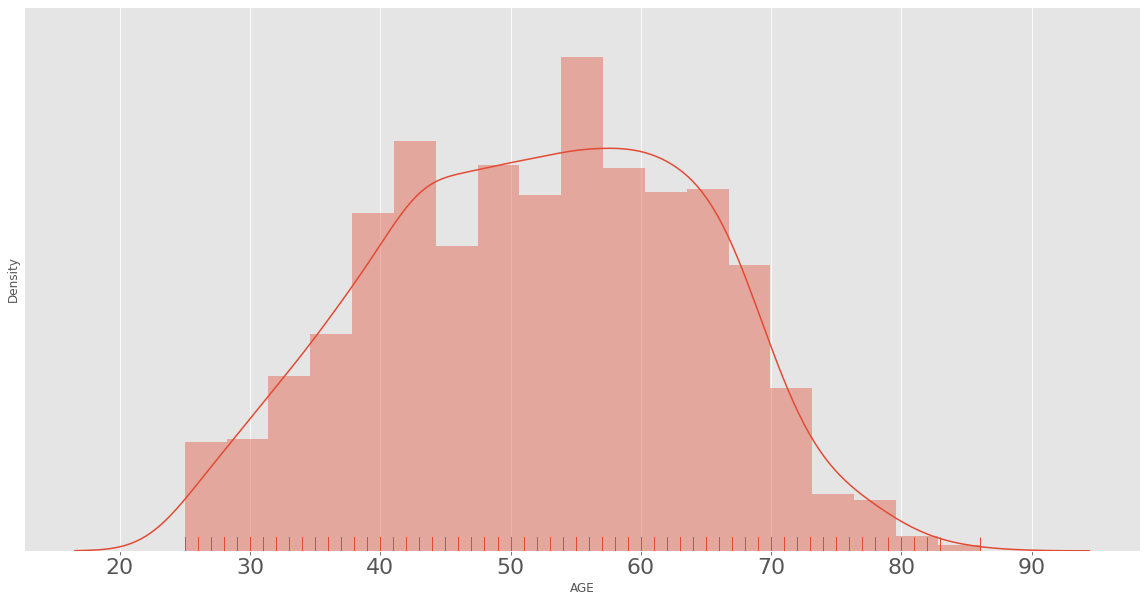

In [196]:
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
sns.distplot(data['AGE'],rug=True)
            
plt.yticks([])
plt.xticks(fontsize=22)
plt.show()

# Number of candidates by top 10 party

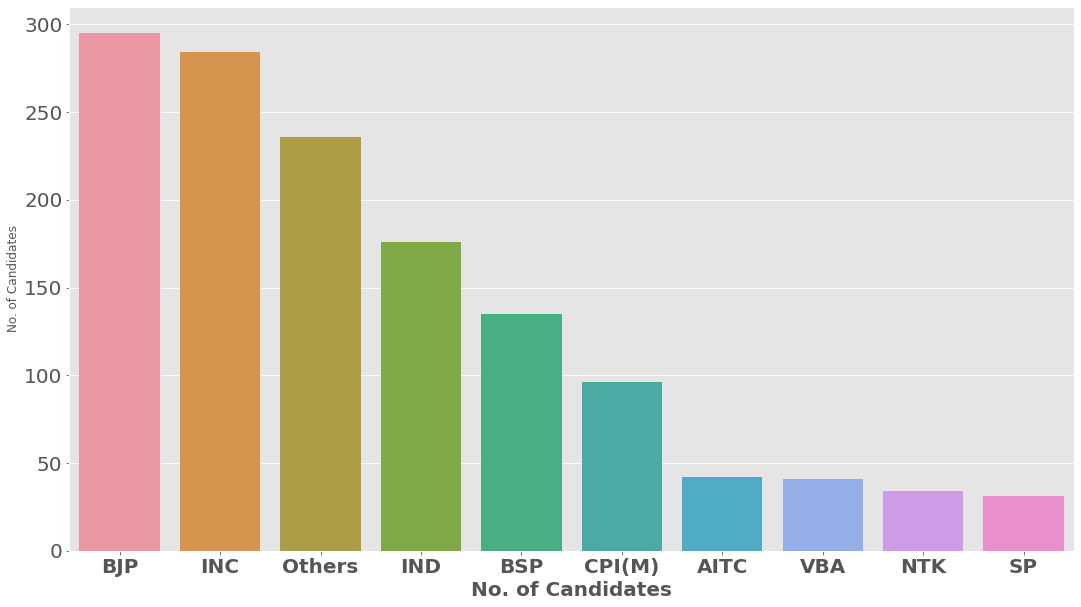

In [197]:
plt.figure(figsize=(18,10))
sns.countplot(x='PARTY',data=data,order=data.PARTY.value_counts().iloc[:10].index)
plt.ylabel('No. of Candidates')
plt.xticks(fontsize=20,fontweight=1000)
plt.yticks(fontsize=20)
plt.xlabel('Party',fontsize=20,fontweight = 'bold')
plt.xlabel('No. of Candidates',fontsize=20,fontweight = 'bold')
plt.show()

# Gender Distribution of Candidates

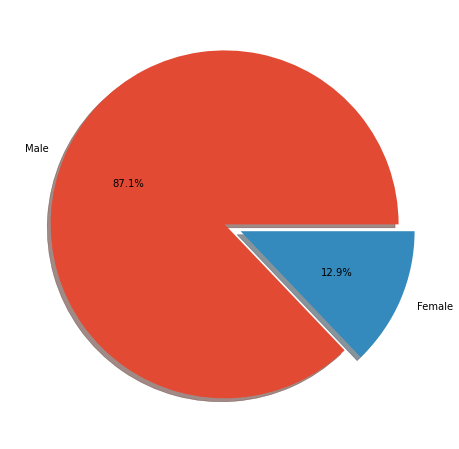

In [93]:
plt.figure(figsize=(16,8))
plt.pie(Elec_df['GENDER'].value_counts(),labels =['Male','Female'],explode = (0, 0.1),shadow=True,autopct='%1.1f%%')
plt.show()


# Age Distribution of Candidates wrt gender and catagory

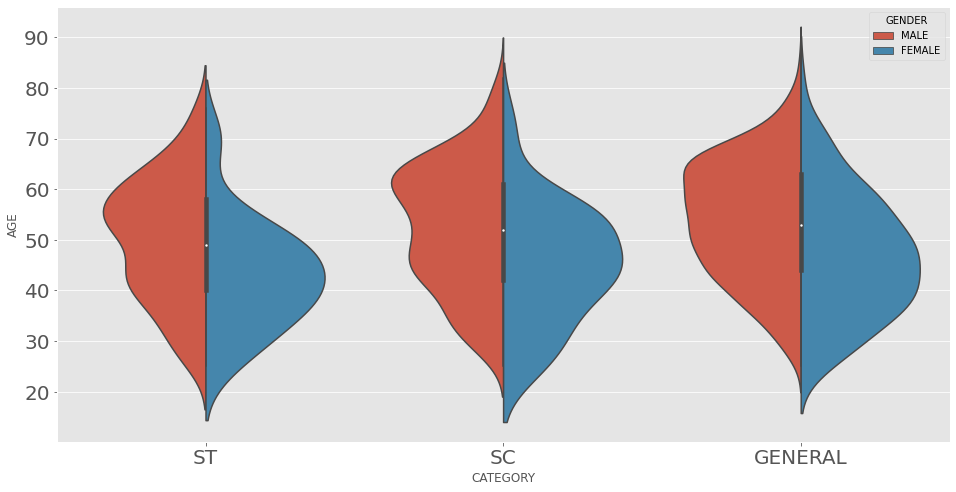

In [198]:
plt.figure(figsize=(16,8))
sns.violinplot(x='CATEGORY',y='AGE',data=data,hue='GENDER',split=True)
plt.xticks(fontsize=20,fontweight=200)
plt.yticks(fontsize=20)
plt.show()

# Analyzing the age distribution of candidates of the top 15 parties

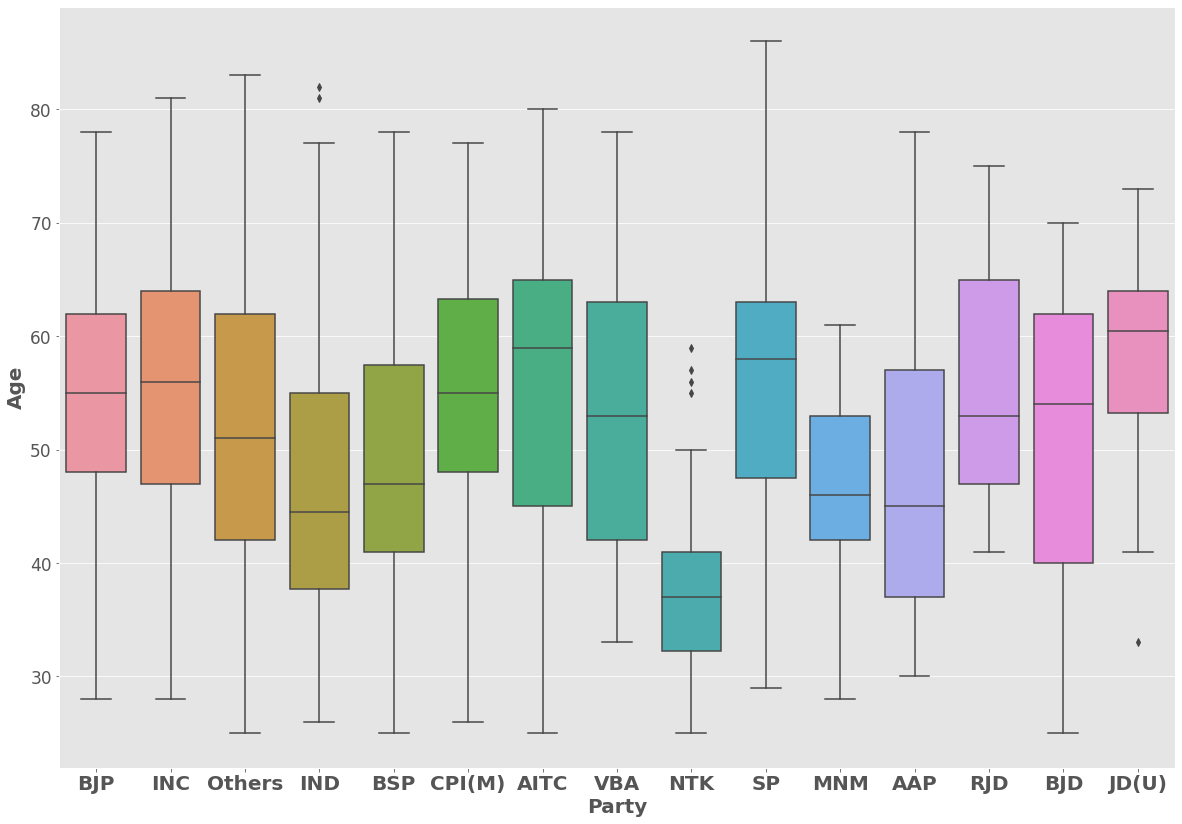

In [199]:
plt.figure(figsize=(20,14))
sns.boxplot(x='PARTY',y='AGE',data=data,order=data.PARTY.value_counts().iloc[:15].index)
plt.xlabel('Party')
plt.ylabel('Age')
plt.xticks(fontsize=20,fontweight='bold')
plt.yticks(fontsize=17)
plt.xlabel('Party',fontsize=20,fontweight='bold')
plt.ylabel('Age',fontsize=20,fontweight='bold')
plt.show()

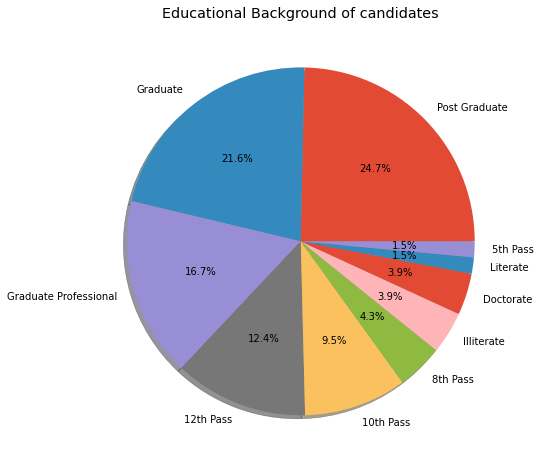

In [99]:
labels=list(dict(Elec_df['EDUCATION'].value_counts()))
d1=list(Elec_df['EDUCATION'].value_counts())
plt.figure(figsize=(16,8))
plt.pie(d1,labels = labels,shadow=True,autopct='%1.1f%%')
plt.title('Educational Background of candidates')
plt.show()

# 4. MODELLING
Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)

LogisticRegression()

In [101]:
LogisticRegression()

LogisticRegression()

 Predict on Test Set

In [102]:
y_pred = logit_model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

Measuring Accuracy

In [104]:
print('Accuracy is : ',accuracy_score(y_test,y_pred))

Accuracy is :  0.8711943793911007


In [105]:
# check matrix values
confusion_matrix(y_test,y_pred)

array([[305,  28],
       [ 27,  67]], dtype=int64)

# KNN Regression

In [106]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,15)

In [107]:
for k in neighbors:
    classifier =KNeighborsClassifier(n_neighbors =k, metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [108]:
acc_values

[0.8524590163934426,
 0.8571428571428571,
 0.8641686182669789,
 0.8665105386416861,
 0.8641686182669789,
 0.8665105386416861,
 0.8688524590163934,
 0.8688524590163934,
 0.8711943793911007,
 0.8618266978922716,
 0.8665105386416861,
 0.8688524590163934]

Text(0, 0.5, 'accuracy')

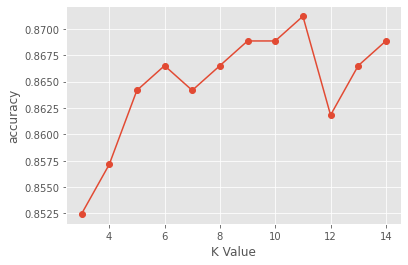

In [109]:
# check for which k value , we get highest accuracy
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K Value')
plt.ylabel('accuracy')

In [110]:
classifier =KNeighborsClassifier(n_neighbors = 11, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

Measuring Accurancy for KNN

In [111]:
print('Accuracy is : ',accuracy_score(y_test,y_pred))

Accuracy is :  0.8711943793911007


In [112]:
# check matrix values
confusion_matrix(y_test,y_pred)

array([[308,  25],
       [ 30,  64]], dtype=int64)

In [113]:
df.describe()

,WINNER,AGE,LIABILITIES,TOTAL_ELECTORS,GENDER_MALE,CATEGORY_SC,CATEGORY_ST,PARTY_AIADMK,PARTY_AITC,PARTY_BJD,...,PARTY_YSRCP,EDUCATION_12th Pass,EDUCATION_5th Pass,EDUCATION_8th Pass,EDUCATION_Doctorate,EDUCATION_Graduate,EDUCATION_Graduate Professional,EDUCATION_Illiterate,EDUCATION_Literate,EDUCATION_Post Graduate
count,1707.000000,1707.000000,1.707000e+03,1.707000e+03,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,...,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000,1707.000000
mean,0.246632,52.171646,1.978619e+06,1.647403e+06,0.871119,0.213240,0.133568,0.008202,0.025776,0.011131,...,0.006444,0.124194,0.014646,0.042765,0.038664,0.216169,0.166960,0.039250,0.015231,0.246632
std,0.431177,12.032311,3.195276e+06,3.067866e+05,0.335166,0.409716,0.340287,0.090217,0.158513,0.104944,...,0.080039,0.329900,0.120165,0.202386,0.192850,0.411751,0.373049,0.194246,0.122508,0.431177
min,0.000000,25.000000,0.000000e+00,5.518900e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,43.000000,0.000000e+00,1.525150e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,53.000000,4.166120e+05,1.683325e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,61.000000,2.500000e+06,1.811851e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,86.000000,1.516338e+07,3.150313e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Decision Tree

In [114]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
print('Accuracy is : ',accuracy_score(y_test,y_pred))

Accuracy is :  0.7868852459016393


In [116]:
confusion_matrix(y_test,y_pred)

array([[272,  61],
       [ 30,  64]], dtype=int64)

# SVM
Linear SVM

In [117]:
from sklearn.svm import SVC
svm_linear = SVC(kernel ='linear')
svm_linear.fit(X_train,y_train)
y_pred =svm_linear.predict(X_test)
print('Accuracy using linear svm is: ',accuracy_score(y_test,y_pred))

Accuracy using linear svm is:  0.8711943793911007


# Random Forest

In [118]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8735362997658079


# Gradient Boosting

In [119]:
from sklearn.ensemble  import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [120]:
gb.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8735362997658079


Since all has similar accuracy, lets choose random forest and finde tune it

# 5. MODEL FINE TUNING
Randon Classifier Fine Tuning

In [122]:
clf=RandomForestClassifier(n_estimators=500,max_depth=10,random_state=42,criterion='entropy')
clf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=500,
                       random_state=42)

In [123]:
y_pred=clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8852459016393442


There is an improvement in our accuracy of model

Gradient Boosting Fine Tuning

In [124]:
gb = GradientBoostingClassifier(max_depth=10,learning_rate=.5,n_estimators=500)

In [125]:
gb.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8852459016393442


incresed accuracy